In [34]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import ndimage
from PIL import Image

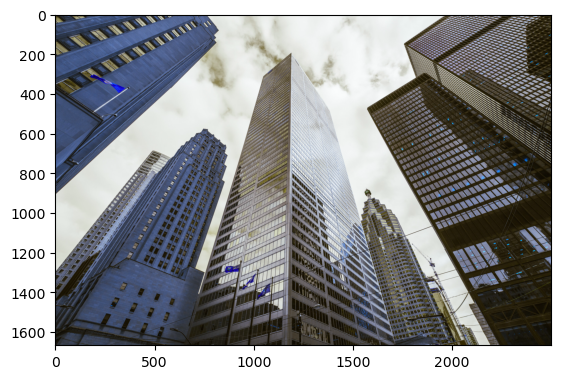

In [35]:
PATH = 'images/'
EDITPATH = 'edited/' 
image1 = cv2.imread(PATH + 'finance.jpeg')

plt.subplot(1,1,1), plt.imshow(image1)
plt.show()

In [36]:
def XY(image):
    casa = np.array(image)
    casa = casa[:,:]
    image = cv2.resize(casa, (512,512))
    
    x = np.arange(-image.shape[0]/2, image.shape[0]/2)
    y = np.arange(-image.shape[1]/2, image.shape[1]/2)
    x, y = np.meshgrid(x, y)

    x = np.linspace(-np.pi, np.pi, image.shape[0])
    y = np.linspace(-np.pi, np.pi, image.shape[1])

    # create meshgrid
    X, Y = np.meshgrid(x, y)

    return X, Y

In [37]:
# crop image to square
def crop_to_square(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = image.astype(np.float32)
    #height and width middles
    height, width = image.shape

    height_middle = int(height/2)
    width_middle = int(width/2)

    offset = int((height_middle + width_middle) / 3)
    image = image[height_middle-offset:height_middle+offset, width_middle-offset:width_middle+offset]

    casa = np.array(image)
    casa = casa[:,:]
    casa = cv2.resize(casa, (512,512))
    return casa

In [38]:
img = crop_to_square(image1)


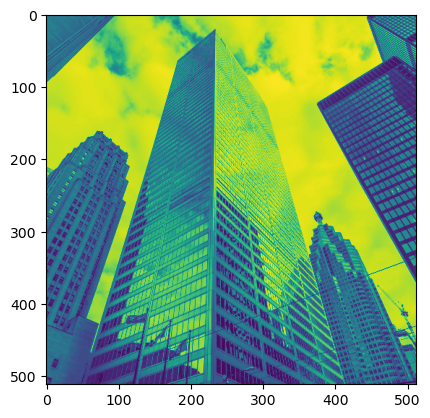

In [39]:
#show
plt.subplot(1,1,1), plt.imshow(img)
plt.show()

# Fournier Transormation => NumPy FFT

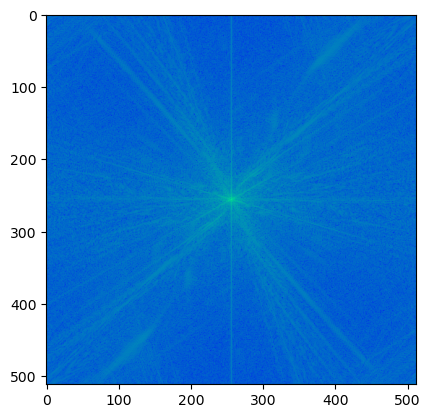

<function matplotlib.pyplot.savefig(*args, **kwargs)>

In [40]:
fft = np.fft.fft2(img)
fft_shift = np.fft.fftshift(fft)
magnitude_spectrum = 20*np.log(np.abs(fft_shift))

plt.subplot(1,1,1), plt.imshow(magnitude_spectrum, cmap = 'winter')
plt.show()
plt.savefig

In [41]:
# save
cv2.imwrite('finance_magnitude_spectrum.jpg', magnitude_spectrum)

True

### Blurring using low-pass filter

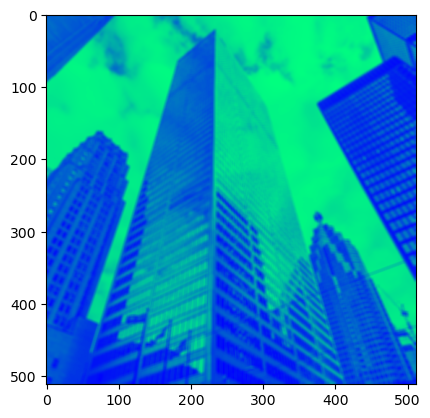

In [42]:
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)
plt.subplot(1,1,1), plt.imshow(dst, cmap = 'winter')
plt.show()

In [43]:
# save
cv2.imwrite('dst.jpg', dst)

True

### Sharpening using high pass filter

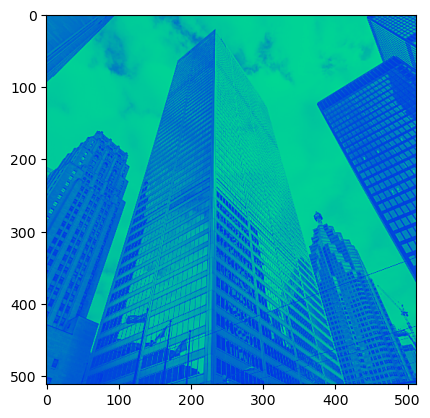

In [44]:
kernel_ = np.ones((5,5),np.float32)/25
#sharp_filtered_image 
sharp_filtered_image = cv2.filter2D(img,-1,kernel_)
#sharpened_image
sharpened_image = cv2.addWeighted(img, 1.5, sharp_filtered_image, -0.5, 0)
plt.subplot(1,1,1), plt.imshow(sharpened_image, cmap = 'winter')
plt.show()

In [45]:
# save
cv2.imwrite(PATH + EDITPATH + 'sharpened.jpg', sharpened_image)

True

# Fournier Transformation => scipy

In [46]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image
from scipy import signal
from numpy.fft import fft2, fftshift, ifft2

In [47]:
# Read image
PATH = 'images/'
img = Image.open(PATH + 'casaloma_resized.jpg').convert('L')

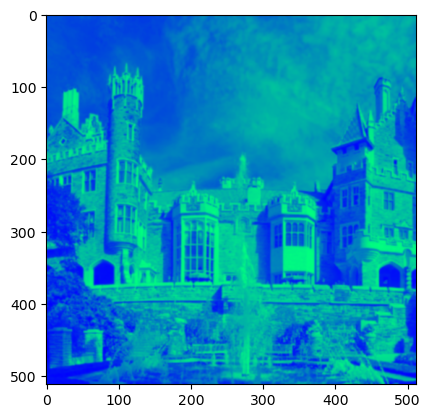

In [48]:
img = np.array(img)
img = img.astype(np.float32)

# Create Gaussian filter
def gaussian_kernel(size, sigma=1):
    size = int(size)//2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0*np.pi*sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

gauss = gaussian_kernel(5, 1)
gauss = gauss / np.sum(gauss)

# Apply Gaussian filter
gauss_filtered_image = signal.convolve2d(img, gauss, boundary='symm', mode='same')

# Show image
plt.subplot(1,1,1), plt.imshow(gauss_filtered_image, cmap = 'winter')
plt.show()

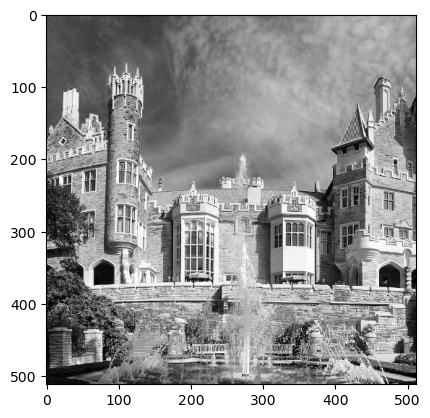

In [49]:


# Show image
plt.imshow(img, cmap='gray')

In [50]:
# Fourier transfor
F = fft2(img)
F = fftshift(F)
# undo shift operation
F2 = ifft2(F)
# take the real part of the inverse transform
F3 = np.real(F2)
# normalize the image to the range [0,1] so that we can display it using imshow().
F3 = F3/np.max(F3)

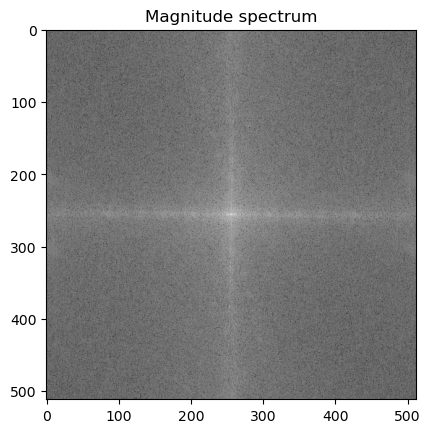

In [51]:
# Show magnitude spectrum
plt.figure()
plt.imshow(np.log(np.abs(F)), cmap='gray')
plt.title('Magnitude spectrum')
plt.show()

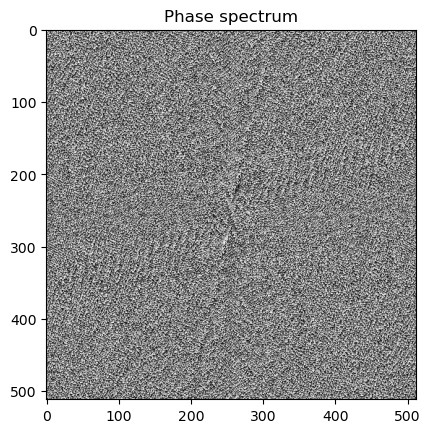

In [52]:
# Show phase spectrum
plt.figure()
plt.imshow(np.angle(F), cmap='gray')
plt.title('Phase spectrum')
plt.show()

In [53]:
# use XY 
x, y = XY(img)

## Gaussian and Laplacian of Gaussian

In [54]:
img = Image.open(PATH + 'casaloma_resized.jpg').convert('L')
img = np.array(img)
img = img.astype(np.float32)

In [55]:
def GaussianFilter(image, sigma):
    kernel = cv2.getGaussianKernel(5, sigma)
    kernel = kernel * kernel.T
    image = cv2.filter2D(image, -1, kernel)
    return image

gauss_filtered_image = GaussianFilter(img, 1)

In [56]:
def laplacian_of_gaussian_filter(image, sigma=1):
    kernel = cv2.getGaussianKernel(5, sigma)
    kernel = (kernel * (kernel.T * sigma))
    image = cv2.filter2D(image, -1, kernel)
    image = cv2.Laplacian(image, -1)
    return image

lap_filtered_image = laplacian_of_gaussian_filter(img, 1)

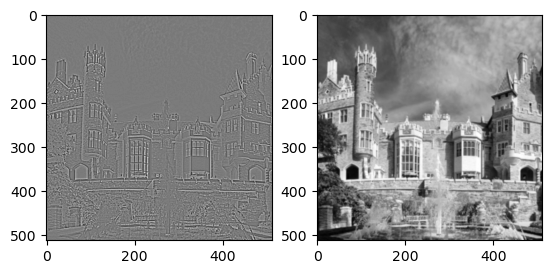

In [57]:
plt.subplot(1,2,2), plt.imshow(gauss_filtered_image, cmap = 'gray')
plt.subplot(1,2,1), plt.imshow(lap_filtered_image, cmap = 'gray')
plt.show()

## Sharpening using high pass filter

#### Seperating the low frequency of the image from Gaussian, helped us acquire the high pass efficiently

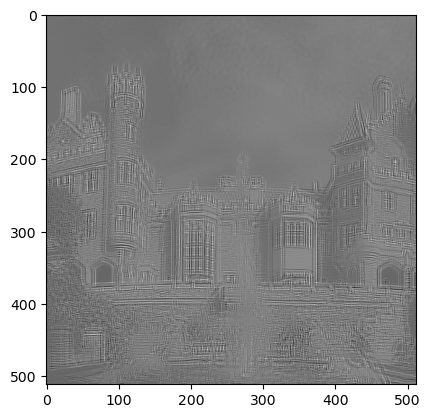

In [58]:
def sharpening_laplacian(image, sigma=1):
    h = laplacian_of_gaussian_filter(image, sigma)
    image = image + h
    return image

sharpened_laplacian = sharpening_laplacian(img, 10)

plt.subplot(1,1,1), plt.imshow(sharpened_laplacian, cmap = 'gray')
plt.show()

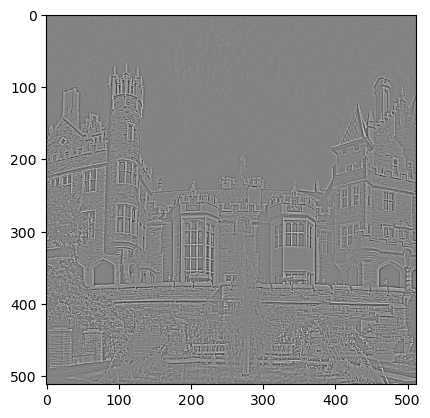

In [63]:
def sharpening_gaussian(image, sigma=1):
    h = GaussianFilter(image, sigma)
    image = image - h
    return image

sharpened_gaussian = sharpening_gaussian(img, 10)

plt.subplot(1,1,1), plt.imshow(sharpened_gaussian, cmap = 'gray')
plt.show()

In [64]:
# save 
cv2.imwrite(PATH + EDITPATH + 'sharpened_gaussian.jpg', sharpened_gaussian)

True

# Edge detection

In [ ]:
from skimage import filters

def sobel(image):
    # sobel filter
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    # apply sobel filter
    sobel_x = signal.convolve2d(image, sobel_x, mode='same', boundary='symm')
    sobel_y = signal.convolve2d(image, sobel_y, mode='same', boundary='symm')

    # calculate magnitude
    sobel = np.sqrt(sobel_x**2 + sobel_y**2)

    return sobel

sobel_filtered_image = sobel(y)

In [ ]:
plt.subplot(121), plt.imshow(img, cmap = 'viridis')
plt.title('Input image'), plt.xticks([]),plt.yticks([])
plt.subplot(122), plt.imshow(sobel_filtered_image, cmap = 'viridis')
plt.title('Edge Detection'), plt.xticks([]),plt.yticks([])
plt.show()

In [ ]:
# save sobel_filtered_image
sobel_filtered_image.save(PATH + EDITPATH +'sobel_filtered_image.png')

In [ ]:
# define prewitt
def prewitt(image):
    # prewitt filter
    prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

    # apply prewitt filter
    prewitt_x = signal.convolve2d(image, prewitt_x, mode='same', boundary='symm')
    prewitt_y = signal.convolve2d(image, prewitt_y, mode='same', boundary='symm')

    # calculate magnitude
    prewitt = np.sqrt(prewitt_x**2 + prewitt_y**2)

    return prewitt

prewitt_filtered_image = prewitt(y)

plt.subplot(121), plt.imshow(img, cmap = 'viridis')
plt.title('Input image'), plt.xticks([]),plt.yticks([])
plt.subplot(122), plt.imshow(prewitt_filtered_image, cmap = 'viridis')
plt.title('Edge Detection'), plt.xticks([]),plt.yticks([])
plt.show()

# save prewitt_filtered_image
prewitt_filtered_image.save(PATH + EDITPATH +'prewitt_filtered_image.png')

# Noise Suppression

In [ ]:
import random

def gaussian_noise(image, mean=0, var=0.1):
    row, col = image.shape
    sigma = var**0.5
    gauss = np.random.normal(mean, sigma, (row, col))
    gauss = gauss.reshape(row, col)
    noisy = image + gauss
    return noisy

def salt_pepper_noise(image, prob=0.05):
    output = np.zeros(image.shape, np.uint8)
    thres = 1 - prob
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

In [ ]:
gauss_noisy_image = gaussian_noise(y, mean=3, var=0.5)
saltpep_noisy_image = salt_pepper_noise(y, prob=0.05)

In [ ]:
cv2.imwrite(PATH + EDITPATH + 'saltpep_noisy_image.jpg', saltpep_noisy_image)

In [ ]:
plt.subplot(131), plt.imshow(img, cmap = 'viridis')
plt.title('Input image'), plt.xticks([]),plt.yticks([])
plt.subplot(132), plt.imshow(gauss_noisy_image, cmap = 'viridis')
plt.title('Gaussian Noise'), plt.xticks([]),plt.yticks([])
plt.subplot(133), plt.imshow(saltpep_noisy_image, cmap = 'viridis')
plt.title('Salt and Pepper Noise'), plt.xticks([]),plt.yticks([])
plt.show()

In [ ]:
def denoiser(image, kernel_size=3):
    denoised_image = cv2.medianBlur(image, kernel_size)
    return denoised_image

denoised_image = denoiser(saltpep_noisy_image, kernel_size=3)

In [ ]:
plt.subplot(131), plt.imshow(saltpep_noisy_image, cmap = 'viridis')
plt.title('Salt & Pepper'), plt.xticks([]),plt.yticks([])
plt.subplot(132), plt.imshow(denoised_image, cmap = 'viridis')
plt.title('Denoised Salt & Pepper'), plt.xticks([]),plt.yticks([])

In [ ]:
# save denoised_image
cv2.imwrite(PATH + EDITPATH + 'saltPep_denoised_image.jpg', denoised_image)